# Electrical Grid Stability Prediction using Random Forest

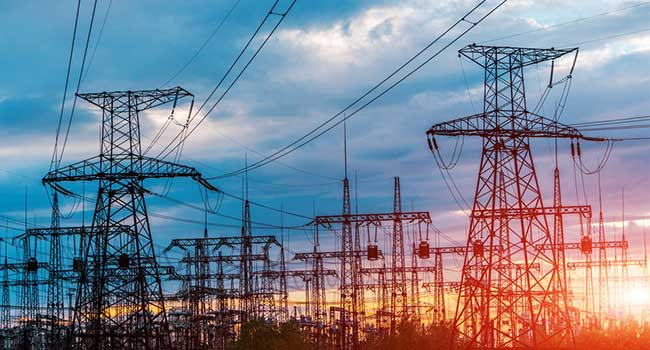

In [1]:
from IPython.display import Image
Image("static/electricgrid.jpg")

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Dataset

In [2]:
df=pd.read_csv("grid_data.csv")
df.head(10)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
5,6.999209,9.109247,3.784066,4.267788,4.429669,-1.857139,-0.670397,-1.902133,0.261793,0.077930,0.542884,0.469931,-0.017385,stable
6,6.710166,3.765204,6.929314,8.818562,2.397419,-0.614590,-1.208826,-0.574004,0.177890,0.397977,0.402046,0.376630,0.005954,unstable
7,6.953512,1.379125,5.719400,7.870307,3.224495,-0.748998,-1.186517,-1.288980,0.371385,0.633204,0.732741,0.380544,0.016634,unstable
8,4.689852,4.007747,1.478573,3.733787,4.041300,-1.410344,-1.238204,-1.392751,0.269708,0.250364,0.164941,0.482439,-0.038677,stable
9,9.841496,1.413822,9.769856,7.641616,4.727595,-1.991363,-0.857637,-1.878594,0.376356,0.544415,0.792039,0.116263,0.012383,unstable


## Exploratory Data Analysis

In [3]:
# summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [4]:
# checking the presence of missing values in each column
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

There is no missing values in given dataset

In [5]:
# descriptive statistics
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


unstable    6380
stable      3620
Name: stabf, dtype: int64


<AxesSubplot:xlabel='stabf', ylabel='count'>

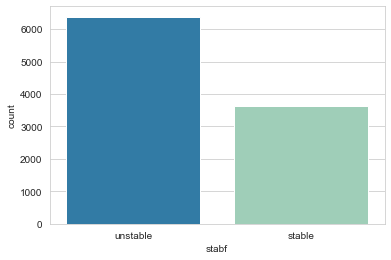

In [6]:
# Show the counts of observations in each category.
print(df['stabf'].value_counts())

sns.set_style('whitegrid')
sns.countplot(x='stabf',data=df, palette='YlGnBu_r')

C:\Users\sai kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


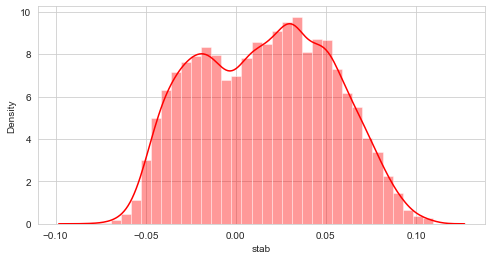

In [8]:
# distribution of observations in column 'stab'.
plt.figure(figsize=(8,4))
sns.distplot(df['stab'], color='r')
plt.show()

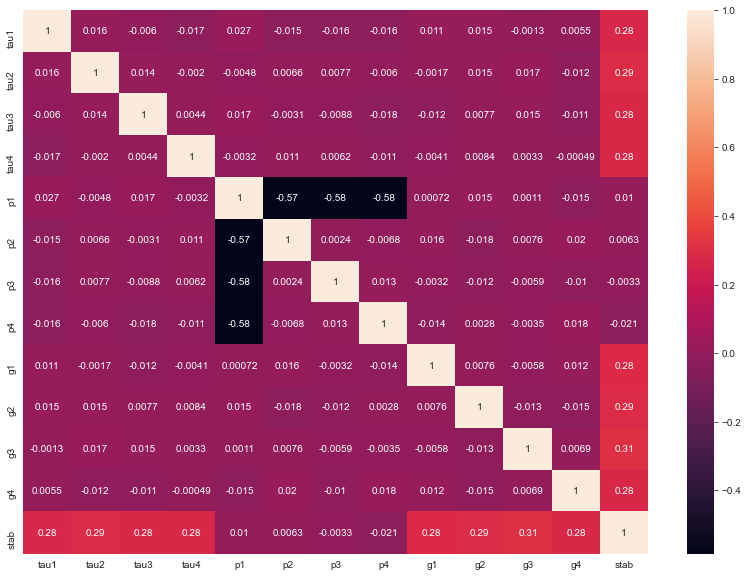

In [9]:
# correlation heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Train Test Split

In [10]:
X = df.drop(['stab', 'stabf'],axis=1)
y = df['stab']
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Scaling

In [11]:
import joblib
from joblib import dump, load
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
joblib.dump(scaler, 'Scaler.joblib')

['Scaler.joblib']

## Build the Model

In [15]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

## Make Predictions on the Test Set

In [23]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

Mean Absolute Error: 0.009173567255534365
Mean Squared Error: 0.0001428469562074053
Root Mean Squared Error: 0.01195185994761507


## Determine Performance Metrics

In [24]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
rsq = regressor.score(X_test,y_test)
    
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 0.009173567255534365
Mean Squared Error: 0.0001428469562074053
Root Mean Squared Error: 0.01195185994761507


## save model in pickle

In [28]:
import pickle
# Saving model to disk
with open('rf.pickle', 'wb') as f:
    pickle.dump(rf, f)

## Load model with pickel 

In [43]:
# Loading model to compare the results
with open('rf.pickle', 'rb') as f:
    clf = pickle.load(f)
type(clf)

sklearn.ensemble._forest.RandomForestRegressor

In [31]:
scaler=load('Scaler.joblib')

## Check with externl data

In [38]:
from sklearn.preprocessing import StandardScaler
def check_stable(t1, t2, t3, t4, p1, p2, p3, p4, g1, g2, g3, g4):
    X_test = scaler.transform([[t1, t2, t3, t4, p1, p2, p3, p4, g1, g2, g3, g4]])
    prediction = clf.predict(X_test)
    print(prediction)
    if prediction>=0:
        return "Oops! the system is linearly unstable."
    else:
        return "Great! the system is stable."

In [39]:
check_stable(4.689852, 4.007747, 1.478573, 3.733787, 4.041300, -1.410344, -1.238204, -1.392751, 0.269708, 0.250364, 0.164941, 0.482439)

[-0.03227562]


'Great! the system is stable.'

In [40]:
check_stable(2.042954, 8.514335, 8.173809, 5.466635, 3.783797, -1.639912,-0.662469, -1.481417, 0.154129, 0.944486, 0.053225, 0.499109)

[0.02451913]


'Oops! the system is linearly unstable.'

In [42]:
check_stable(3.392299, 1.274827, 2.954947, 6.894759, 4.349512, -1.663661, -0.952437, -1.733414, 0.502079, 0.567242, 0.285880, 0.366120)

[-0.02701751]


'Great! the system is stable.'